In [19]:
## Problem Statement: The prediction task is to determine whether a person makes over $50K a year.
## Our target variable is Income.
## Our faetures are Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot
sns.set(style='white', context='notebook', palette='deep')
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
%config Completer.use_jedi = False
## Lets check the skewness of data.
import warnings
warnings.filterwarnings('ignore')

In [21]:
df= pd.read_csv("census_income.csv")

In [22]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [23]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [24]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [25]:
df.shape

(32560, 15)

In [26]:
df.describe()##It seems there is  no  missing values as count is same for each columns. Lets check null value column wise.


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


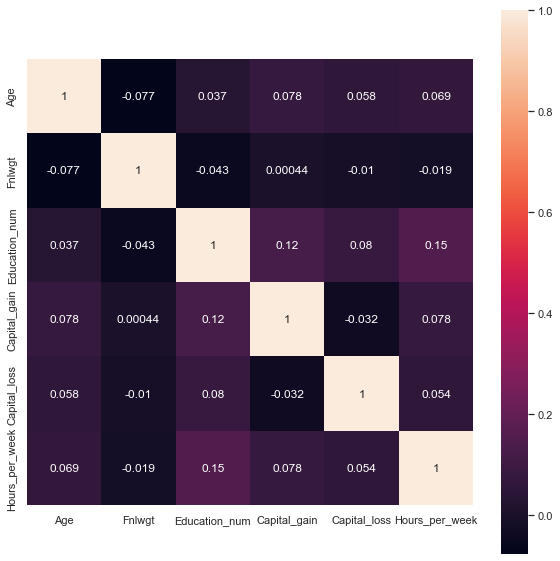

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='pearson'), annot=True, square=True)
plt.show()

In [28]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [36]:
##Lets divide data into two features(x) and Label(y)
x=df.drop("Income", axis=1)
y=df['Income']


In [37]:
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [38]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


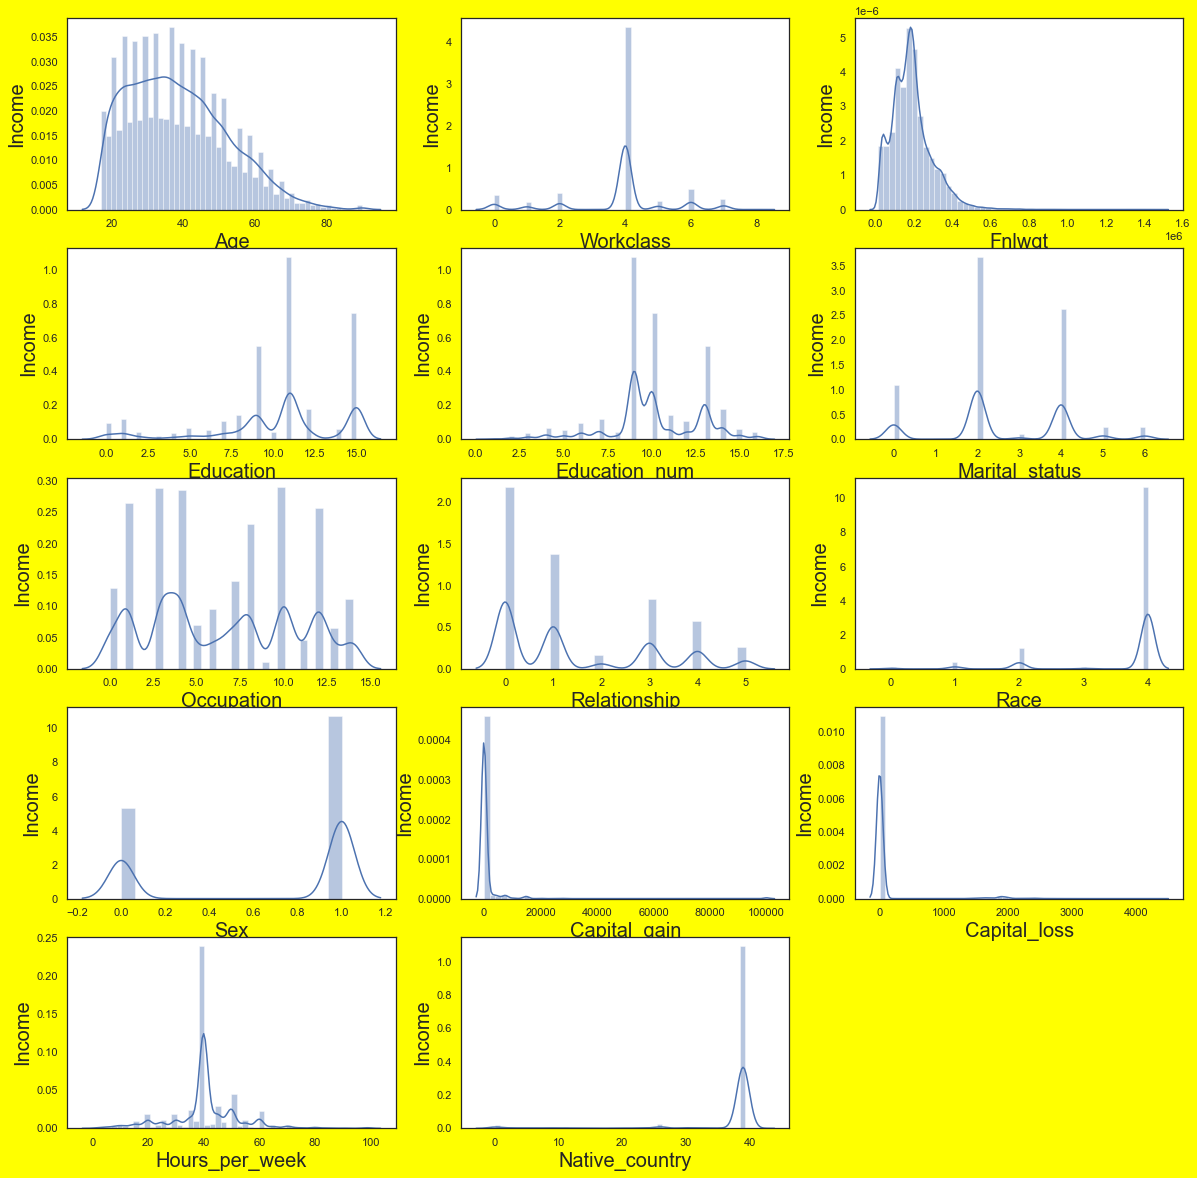

In [39]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
        plt.ylabel('Income',fontsize=20)
        plotnumber+=1
        
plt.show()

In [40]:
## We can see there are many skewness in different columns like in BusinessTravel, DistanceFromHome,JobLevel,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel, TotalWorkingYears , YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.
## Lets treat skewness of required columns with continous data.
df['Age']=np.sqrt(df['Age'])
df['Fnlwgt']=np.sqrt(df['Fnlwgt'])

In [41]:
df.skew()

Age                0.204335
Workclass         -0.752280
Fnlwgt             0.189066
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

Age
0.2043259503960466


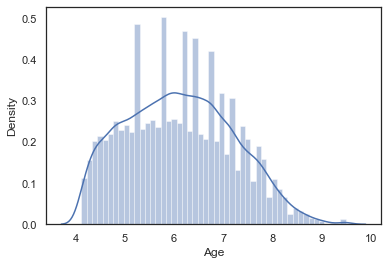

Workclass
-0.7522454408295943


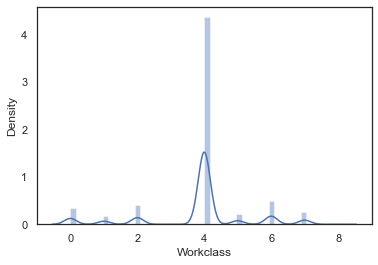

Fnlwgt
0.18905698213450606


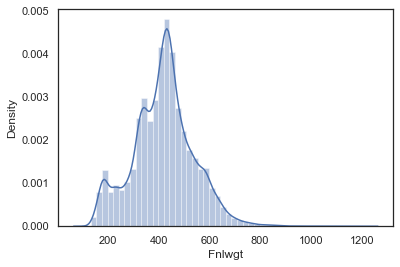

Education
-0.9340196537739126


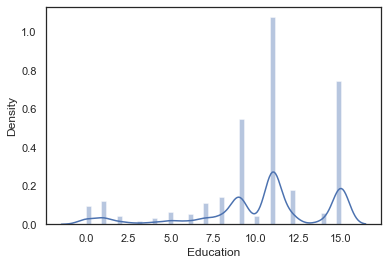

Education_num
-0.31161553498633193


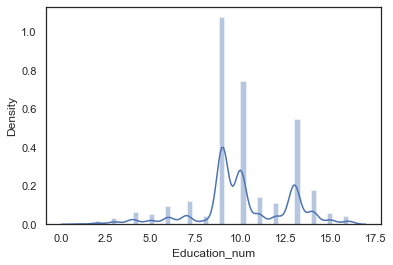

Marital_status
-0.013446962916864369


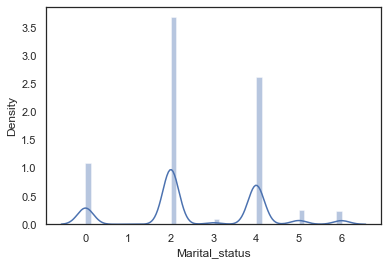

Occupation
0.11453431348441435


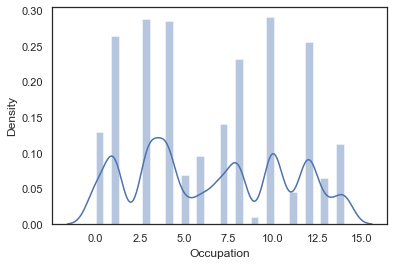

Relationship
0.7867473090814343


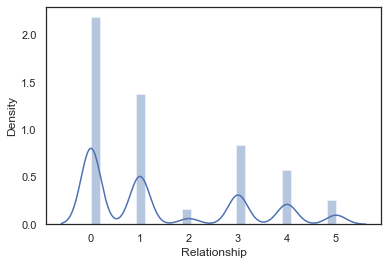

Race
-2.4352196663495116


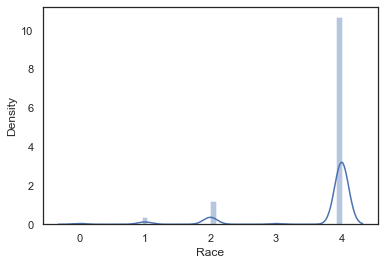

Sex
-0.7192106431922183


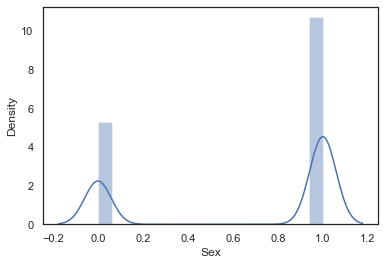

Capital_gain
11.953139157554617


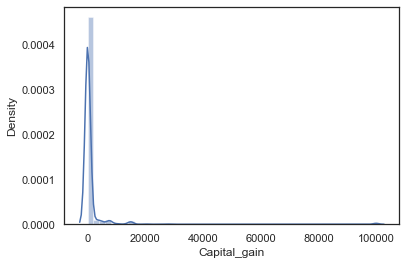

Capital_loss
4.594337190555792


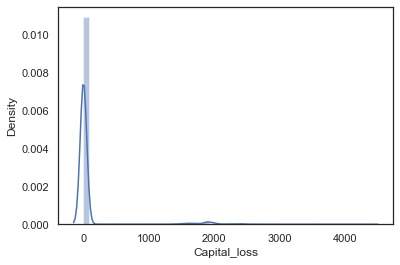

Hours_per_week
0.2276253044722967


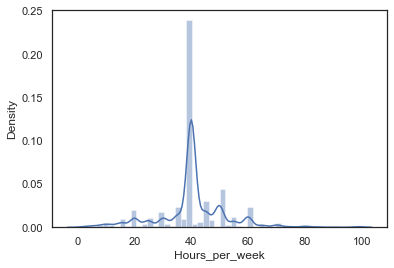

Native_country
-3.658066813887923


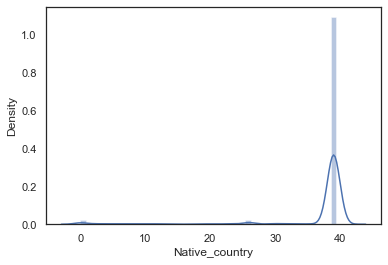

Income
1.212327081863191


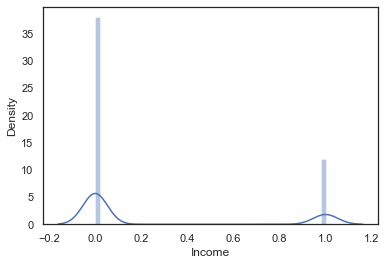

In [42]:
from scipy.stats import skew
for i in df:
    print(i)
    print(skew(df[i]))
    plt.figure()
    sns.distplot(df[i])
    
    plt.show()

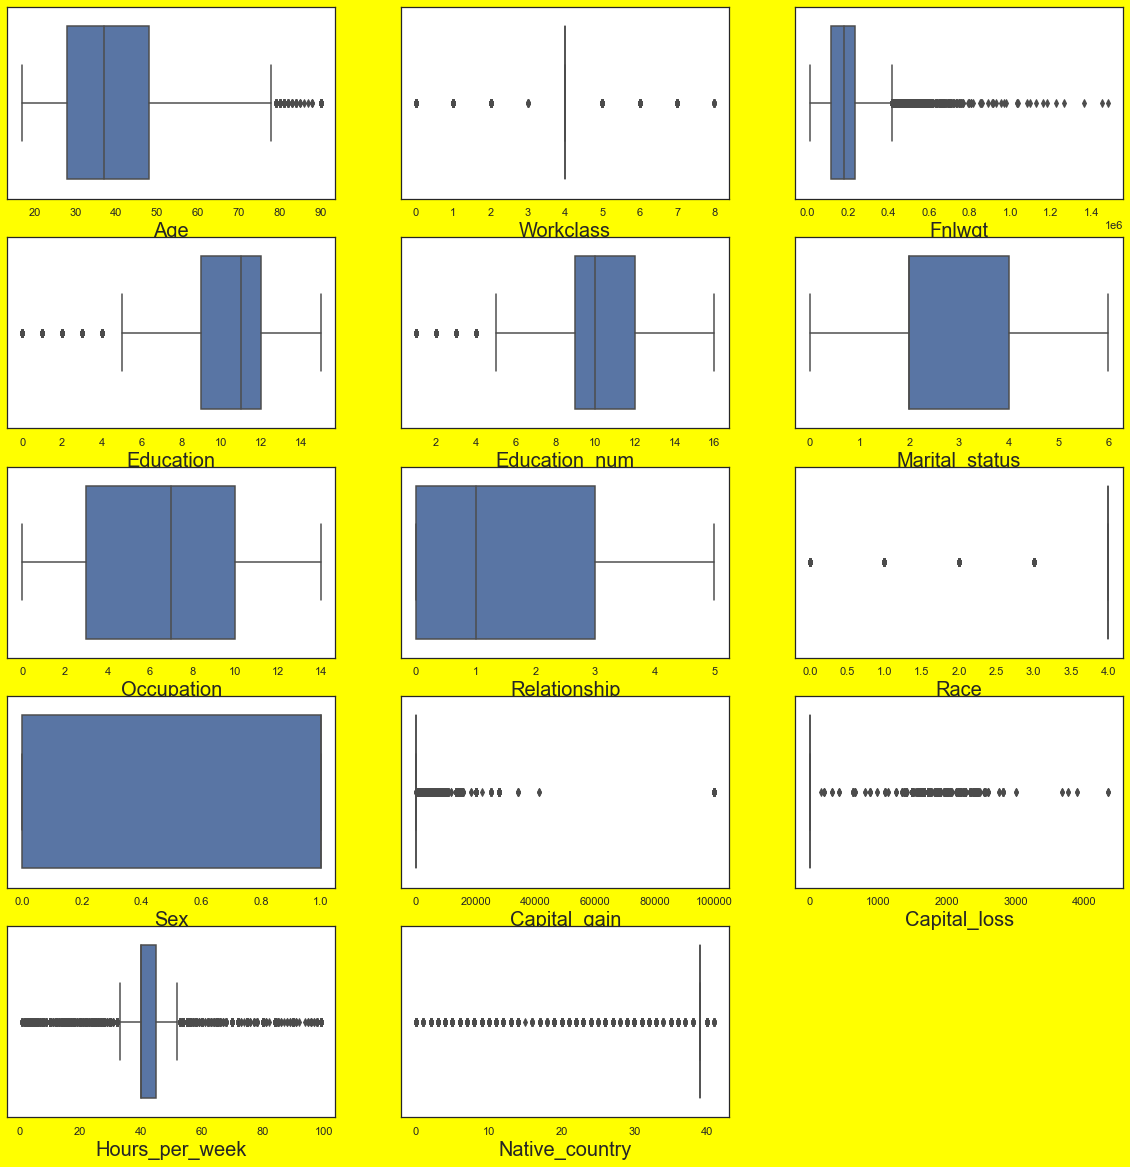

In [43]:
## Lets see how data is distributed and check outliers.
plt.figure(figsize=(20,50),facecolor='yellow')
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [44]:
df.shape

(32560, 15)

In [45]:
from scipy.stats import zscore
z= np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([13, 12,  8, ...,  8,  8,  8], dtype=int64))

In [53]:
df= df[(z<3).all(axis=1)]
df.shape


(27661, 15)

In [57]:
Data_loss=((32560-27661)/32560)*100

In [59]:
Data_loss

15.046068796068795

In [60]:
df.reset_index()

,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,7.071068,6.0,288.636450,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,1,6.164414,4.0,464.377002,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,2,7.280110,4.0,484.480134,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,4,6.082763,4.0,533.462276,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
4,5,7.000000,4.0,400.233682,6.0,5,3.0,8.0,1.0,2.0,0.0,0,0,16,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27656,32555,5.196152,4.0,507.249446,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
27657,32556,6.324555,4.0,392.904569,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
27658,32557,7.615773,4.0,389.756334,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
27659,32558,4.690416,4.0,448.876375,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


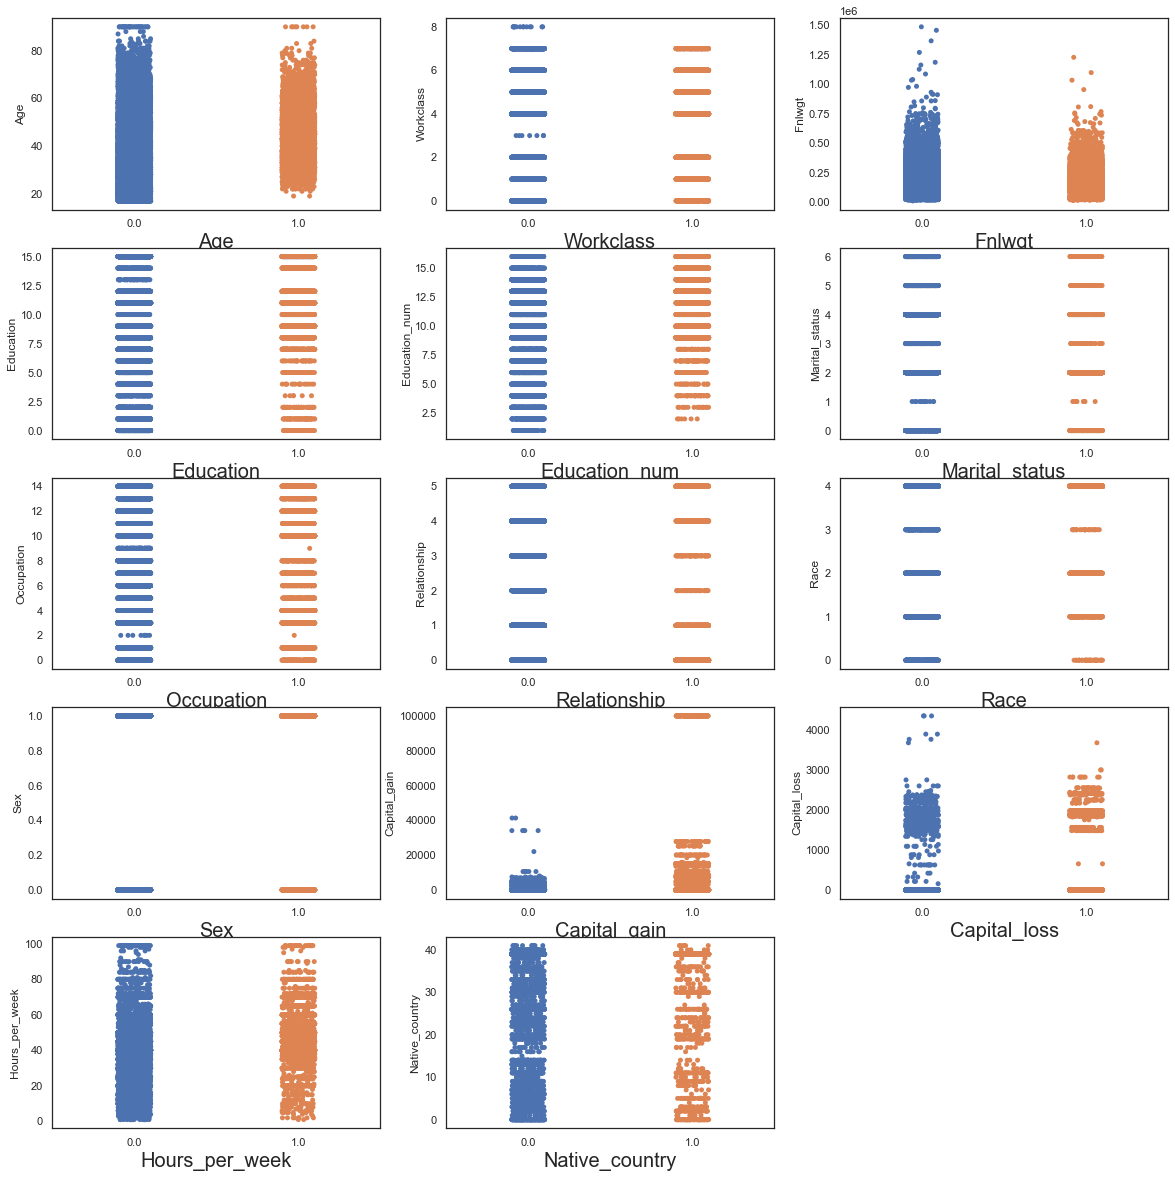

In [61]:
## Lets see how data is distributed.
plt.figure(figsize=(20,50))
plotnumber=1
for column in x:
    if plotnumber<=35:
        ax=plt.subplot(12,3,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column,fontsize=20)
    
        plotnumber+=1
        
plt.show()

In [62]:
print('Correlation of different features of our dataset with  :')
for i in df.columns:
  corr, _ = pearsonr(df[i], df['Income'])
  print('%s : %.4f' %(i,corr))

Correlation of different features of our dataset with  :
Age : 0.2538
Workclass : 0.0403
Fnlwgt : -0.0065
Education : 0.0712
Education_num : 0.3205
Marital_status : -0.1935
Occupation : 0.0700
Relationship : -0.2479
Race : 0.0935
Sex : 0.2119
Capital_gain : 0.3432
Capital_loss : -0.0165
Hours_per_week : 0.2345
Native_country : 0.0480
Income : 1.0000


In [63]:
## Lets do scaling to avoid partiality by model on the basis of number size.
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,8.521048,Age
1,8.476048,Workclass
2,4.031761,Fnlwgt
3,9.210456,Education
4,18.379852,Education_num
5,3.976061,Marital_status
6,3.711144,Occupation
7,2.612271,Relationship
8,17.577780,Race
9,4.441515,Sex


In [66]:
##Creating training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
#Feature scaling, but not scaling dependent variable as it has categorical data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
## Lets split our data into train and test data
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [68]:
## I am choosing this model because our taget variable is binary classification.
logreg = LogisticRegression(solver='lbfgs', random_state=40)
logreg.fit(x_train, y_train)

LogisticRegression(random_state=40)

In [69]:
rfc = RandomForestClassifier(n_estimators=25, criterion='gini', random_state=0,)
rfc.fit(x_train, y_train)
pred_rf = rfc.predict(x_test)
Y_compare_rfc = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_rf})
print(Y_compare_rfc.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_rf))

       Actual  Predicted
14160     0.0        0.0
27047     0.0        0.0
28867     1.0        1.0
5667      1.0        1.0
7827      0.0        0.0

Confussion matrix:
[[4534  378]
 [ 609  991]]


In [70]:
from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_rf))

Accuracy Score :  0.8484336609336609


In [71]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

pred_logreg = logreg.predict(x_test)
Y_compare_logisticRegression = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_logreg})
print(Y_compare_logisticRegression.sample(5))

## Confusion matrix
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_logreg))

       Actual  Predicted
11931     0.0        0.0
31983     0.0        0.0
1664      0.0        0.0
6656      0.0        0.0
16579     0.0        0.0

Confussion matrix:
[[4623  289]
 [ 887  713]]


In [72]:
## We can see confusion matrix, now lets check Accuracy Score of the model.

In [73]:

from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_logreg))

Accuracy Score :  0.8194103194103194


In [74]:
##Lets check the classification matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_logreg))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4912
         1.0       0.71      0.45      0.55      1600

    accuracy                           0.82      6512
   macro avg       0.78      0.69      0.72      6512
weighted avg       0.81      0.82      0.80      6512



In [75]:
knn = KNN(n_neighbors=2, metric='minkowski', p=2,)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
Y_compare_knn = pd.DataFrame({'Actual' : y_test, 'Predicted' : pred_knn})
print(Y_compare_knn.head())
print('\nConfussion matrix:')
print(confusion_matrix(y_test, pred_knn))

       Actual  Predicted
14160     0.0        0.0
27047     0.0        0.0
28867     1.0        0.0
5667      1.0        0.0
7827      0.0        0.0

Confussion matrix:
[[4664  248]
 [ 997  603]]


In [76]:

from sklearn.metrics import accuracy_score
print ("Accuracy Score : ", accuracy_score(y_test, pred_knn))

Accuracy Score :  0.8088144963144963


In [83]:
## Conclusion:-

##  I have done EDA using Pandas and other plotting libraries.
##  Also made use of packages like matplotlib, plotly and seaborn to develop better insights about the data.
## I have also seen how preproceesing helps in dealing with missing values and irregualities present in the data.
## I also learnt how to create new features which will in turn help us to better predict the survival.
## I get to know what are the features on which price is highly positively and negatively coorelated with.
## I came to know through analysis which model will be work with better accuracy with the help of low residual and RMSE scores.
## This project helped me to understand which model to choose first and go step by step to attain results with good accuracy. 
## Also get to know where to use LogisticRegression, KNN, Random Forest and other applicable and required models to fine tune the predictions.
## We can see RandomForestClassifier has highiest accuracy score.
## Lets check importance of different feature on the basis of random forest.

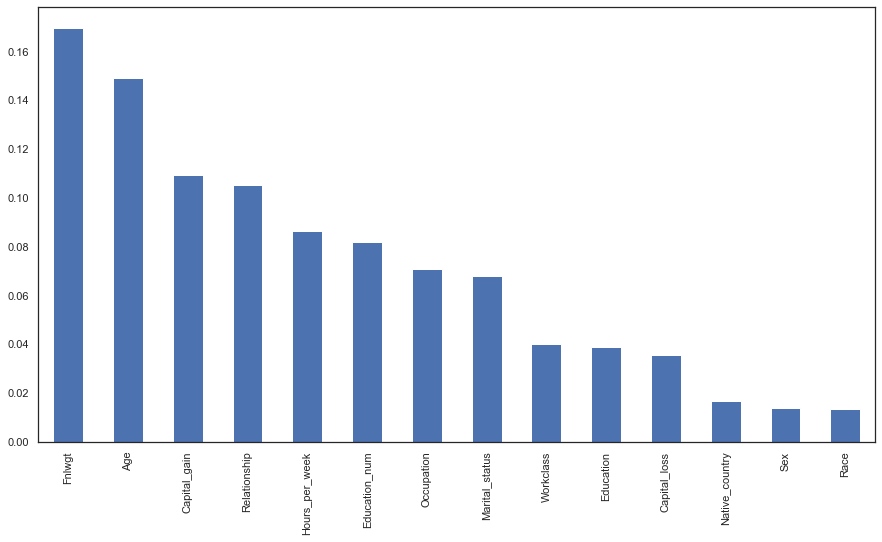

In [84]:

pd.Series(rfc.feature_importances_, 
         index = x.columns).sort_values(ascending = False).plot(kind = 'bar', 
                                                                figsize = (15,8));

In [82]:
print("                     ************* END OF PROJECT****************                    ")


                     ************* END OF PROJECT****************                    
